In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import math
import iaaft


In [2]:
data = Dataset("K:/private/lorenzogamba,tomscag/total_precipitation_5grid.nc", 'r')

# print variables 
for var in data.variables:
    print(var)

lat = data.variables['lat']
lon = data.variables['lon']
time = data.variables['time']
tp = data.variables['tp']


print(lat)
print(lon)
print(time)
print(tp)
'''dayofyear = data.variables['dayofyear']
height = data.variables['height']
 
print(tas)
print(dayofyear)'''

lat
lon
realization
time
tp
<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    _FillValue: nan
    units: degrees_north
    standard_name: latitude
    long_name: latitude
    stored_direction: decreasing
    axis: Y
    positive: up
    type: double
    valid_max: 90.0
    valid_min: -90.0
unlimited dimensions: 
current shape = (37,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    _FillValue: nan
    units: degrees_east
    standard_name: longitude
    long_name: longitude
    axis: X
    positive: up
    type: double
    valid_max: 360.0
    valid_min: -180.0
unlimited dimensions: 
current shape = (72,)
filling on
<class 'netCDF4._netCDF4.Variable'>
int64 time(time)
    long_name: time
    standard_name: time
    axis: T
    stored_direction: increasing
    type: double
    units: days since 1970-01-01 00:00:00
    calendar: proleptic_gregorian
    cell_methods: time: mean
unlimited dimensions: time
current shape = (19358,)
filling on, default _FillValue of 

"dayofyear = data.variables['dayofyear']\nheight = data.variables['height']\n \nprint(tas)\nprint(dayofyear)"

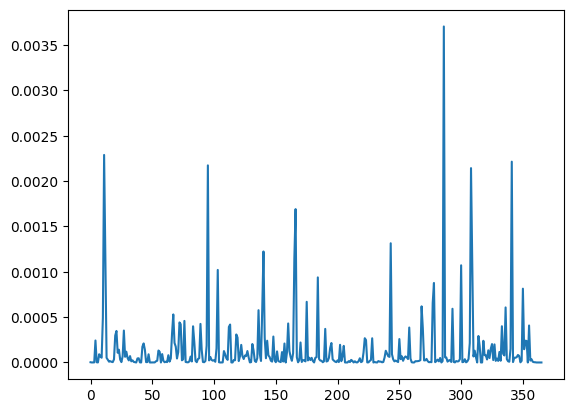

In [22]:
ts = tp[:366, 12,31]
plt.plot(range(366), ts)

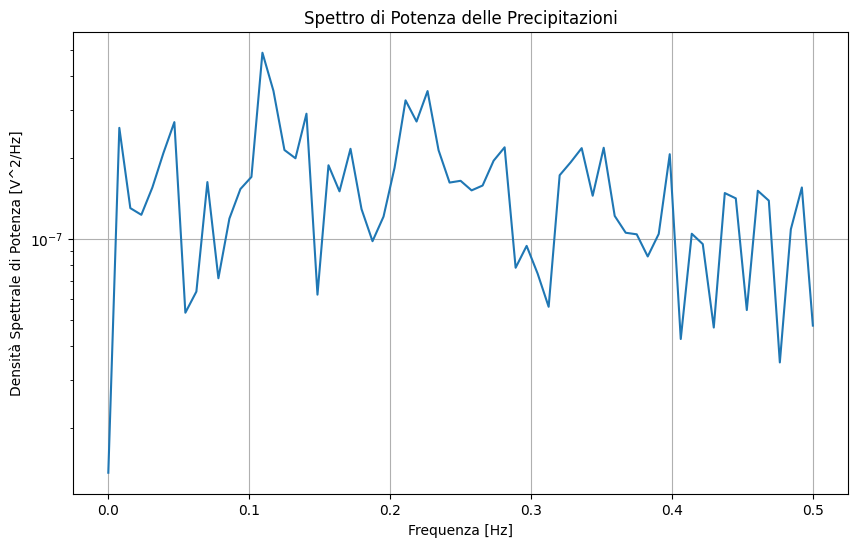

In [14]:
from scipy.signal import welch

fs = 1  # Frequenza di campionamento: 1 campione al giorno
f, Pxx_den = welch(ts, fs, nperseg=128)

# Visualizza lo spettro di potenza
plt.figure(figsize=(10, 6))
plt.semilogy(f, Pxx_den)
plt.title('Spettro di Potenza delle Precipitazioni')
plt.xlabel('Frequenza [Hz]')
plt.ylabel('Densità Spettrale di Potenza [V^2/Hz]')
plt.grid()
plt.show()

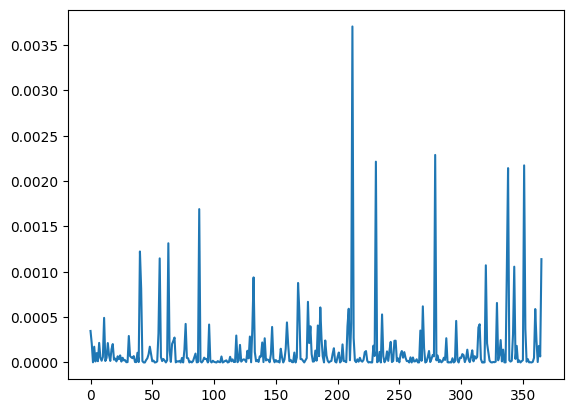

In [11]:
surr = iaaft.surrogates(tp[:366, 12,31], ns=2, verbose=False )
plt.plot(range(366), surr[0])

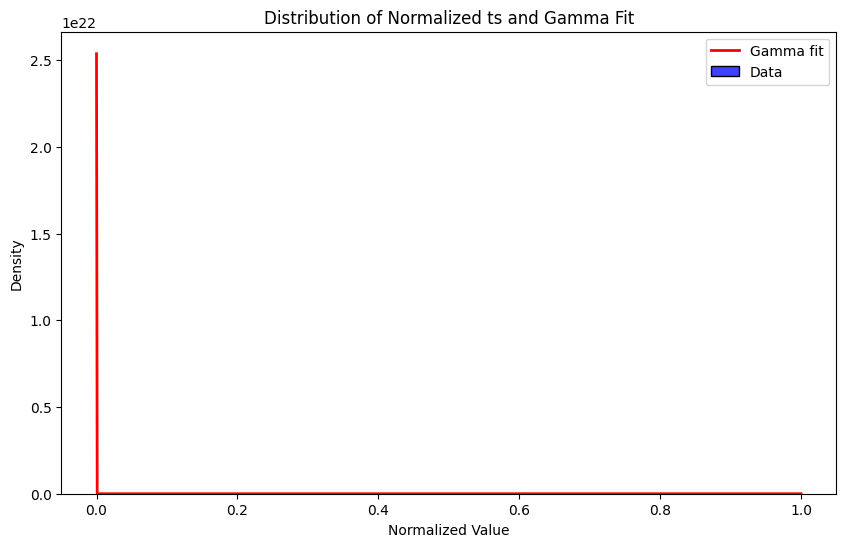

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma

# Normalizzazione Min-Max
ts_min = np.min(ts)
ts_max = np.max(ts)
ts_normalized = (ts - ts_min) / (ts_max - ts_min)

# Plot della distribuzione dei valori normalizzati di ts
plt.figure(figsize=(10, 6))
sns.histplot(ts_normalized, bins=30, kde=False, color='blue', stat='density', label='Data')

# Fit di una distribuzione gamma sui dati normalizzati
shape, loc, scale = gamma.fit(ts_normalized)

# Generazione dei valori della distribuzione gamma fit
x = np.linspace(min(ts_normalized), max(ts_normalized), 1000)
pdf_fitted = gamma.pdf(x, shape, loc, scale)

# Plot della distribuzione gamma fit
plt.plot(x, pdf_fitted, 'r-', lw=2, label='Gamma fit')
plt.title('Distribution of Normalized ts and Gamma Fit')
plt.xlabel('Normalized Value')
plt.ylabel('Density')
plt.legend()
plt.show()



In [26]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def create_new_dataset(original_ds, start_date='1970-01-01'):
    num_days = original_ds.dims['time']  # Assumendo che 'time' sia la dimensione temporale
    dates = pd.date_range(start=start_date, periods=num_days, freq='D')

    new_ds = xr.Dataset(
        {
            'tp': (('time', 'lat', 'lon'), np.full((num_days, len(original_ds['lat']), len(original_ds['lon'])), np.nan))
        },
        coords={
            'lat': original_ds['lat'],
            'lon': original_ds['lon'],
            'time': ('time', dates)
        }
    )
    
    new_ds['time'].attrs['units'] = 'days since 1970-01-01 00:00:00'
    #new_ds['t2m'].attrs = original_ds['t2m'].attrs  # Copia gli attributi se necessario

    return new_ds



'''def remove_annual_linear_trend(ds, trend_removed, variable, startdays):
    """ Rimuove il trend lineare globale da tutta la serie temporale di griglia per la variabile specificata. """
    #trend_removed = ds.copy()
    
    for lat in range(len(ds['lat'])):
        for lon in range(len(ds['lon'])):
            # Seleziona i dati per la lat e lon corrente
            y = ds[variable].isel(lat=lat, lon=lon)
            for dec in range(len(startdays)-1):
                annualy= y[startdays[dec]:startdays[dec+1]]
                if len(annualy.dropna('time')) > 1:  # Assicurati che ci siano almeno due punti dati per fare un fit
                    x = np.arange(len(annualy))
                    fit = np.polyfit(x, annualy, 1)  # Fit lineare
                    trend = np.polyval(fit, x)  # Calcola il trend

                    #print(trend_removed[variable][startdays[dec]:startdays[dec+1], lat, lon])
                    trend_removed[variable][startdays[dec]:startdays[dec+1], lat, lon] = trend
                    

    return trend_removed'''
def plot_decadal_data(series1, series2, lat, lon, title="Decadal Data Comparison", xlabel="Time", ylabel="Value"):
    """
    Plot two lists of time series data.

    Parameters:
    series1: First list of time series data.
    series2: Second list of time series data.
    lat: Latitude for the data point.
    lon: Longitude for the data point.
    title: Title of the plot.
    xlabel: Label for the x-axis.
    ylabel: Label for the y-axis.
    """
    plt.figure(figsize=(14, 7))
    
    # Ensure that series1 and series2 have the same length
    if len(series1) != len(series2):
        raise ValueError("The two series must have the same length.")
    
    # Plot the first series
    plt.plot(series1.time.values, series1, label=f'Series 1 (lat={lat}, lon={lon})', color='blue')
    
    # Plot the second series
    plt.plot(series2.time.values, series2, label=f'Series 2 (lat={lat}, lon={lon})', color='red')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()


### altra prova, non va
def remove_annual_linear_trend(ds, variable):  
    """Rimuove il trend lineare annuale da ogni serie temporale di griglia per la variabile specificata."""
    trend_removed = ds.copy()
    years = range(1970, 2022)
    for year in years:
        sudd = new_ds[variable].sel(time = str(year))
        for lat in range(len(new_ds['lat'])):
            for lon in range(len(new_ds['lon'])):
                # Seleziona i dati per l'anno, lat e lon corrente
                y = sudd.isel(lat=lat, lon=lon)
                    
                if len(y.dropna(dim='time')) > 3:  # Evita anni con un solo dato o senza dati
                    # Fit lineare
                    x = np.arange(len(y))
                    fit = np.polyfit(x, y.values, 1)
                    trend = np.polyval(fit, x)
                    
                    # Calcola gli indici di tempo per l'anno corrente per applicare la correzione
                    time_indices = ds.sel(time=str(year)).time
                    #plot_decadal_data(trend, trend, lat, lon)
                    # Sottrai il trend dai dati originali
                    trend_removed[variable].loc[dict(time=time_indices, lat=ds['lat'][lat], lon=ds['lon'][lon])] -= trend

    return trend_removed


def remove_decadal_linear_trend(ds, variable):
    """Rimuove il trend lineare decennale da ogni serie temporale di griglia per la variabile specificata."""
    trend_removed = ds.copy()
    decades = range(1970, 2022, 10)
    for start_year in decades:
        end_year = start_year + 9
        decadal_data = ds.sel(time=slice(str(start_year), str(end_year)))
        for lat in range(len(ds['lat'])):
            for lon in range(len(ds['lon'])):
                # Seleziona i dati per il decennio, lat e lon corrente
                y = decadal_data[variable].isel(lat=lat, lon=lon)
                    
                if len(y.dropna(dim='time')) > 3:  # Evita decenni con pochi dati
                    # Fit lineare
                    x = np.arange(len(y))
                    fit = np.polyfit(x, y, 1)
                    trend = np.polyval(fit, x)
                    
                    # Calcola gli indici di tempo per il decennio corrente per applicare la correzione
                    time_indices = decadal_data.time

                    # Sottrai il trend dai dati originali
                    trend_removed[variable].loc[dict(time=time_indices, lat=ds['lat'][lat], lon=ds['lon'][lon])] -= trend

    return trend_removed

def remove_global_linear_trend(ds, variable):
    """ Rimuove il trend lineare globale da tutta la serie temporale di griglia per la variabile specificata. """
    trend_removed = ds.copy()
    
    for lat in range(len(ds['lat'])):
        for lon in range(len(ds['lon'])):
            # Seleziona i dati per la lat e lon corrente
            y = ds[variable].isel(lat=lat, lon=lon)
            if len(y.dropna('time')) > 1:  # Assicurati che ci siano almeno due punti dati per fare un fit
                x = np.arange(len(y))
                fit = np.polyfit(x, y, 1)  # Fit lineare
                trend = np.polyval(fit, x)  # Calcola il trend

                # Sottrai il trend dai dati
                trend_removed[variable][:, lat, lon] -= trend

    return trend_removed

def compute_anomalies(ds, VARIABLE, BASELINE_INTERVAL):
    start, end = BASELINE_INTERVAL
    ds = ds[VARIABLE]
    ds_baseline = ds.sel(time=(ds['time.year'] >= start) & (ds['time.year'] <= end))
    
    gb = ds_baseline.groupby('time.dayofyear')
    clim = gb.mean(dim='time')
    std_clim = gb.std(dim='time')
    
    clim_time = clim.sel(dayofyear=ds.time.dt.dayofyear)
    std_clim_time = std_clim.sel(dayofyear=ds.time.dt.dayofyear)

    anomalies = (ds - clim_time)
    return anomalies






# Carica il dataset originale
original_ds = xr.open_dataset("K:/private/lorenzogamba,tomscag/total_precipitation_5grid.nc")
new_ds = create_new_dataset(original_ds)
new_ds['tp'].loc[:,:,:] = original_ds['tp']

# anomalie baseline 1970, 1989
BASELINE_INTERVAL = [1970, 1989]
anomalies_bs7089 = compute_anomalies(new_ds, 'tp', BASELINE_INTERVAL)

# anomalie baseline 1970, 2021
BASELINE_INTERVAL2 = [1970, 2021]
anomalies_bs7021 = compute_anomalies(new_ds, 'tp', BASELINE_INTERVAL2)


C:\Users\David\AppData\Roaming\Python\Python311\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


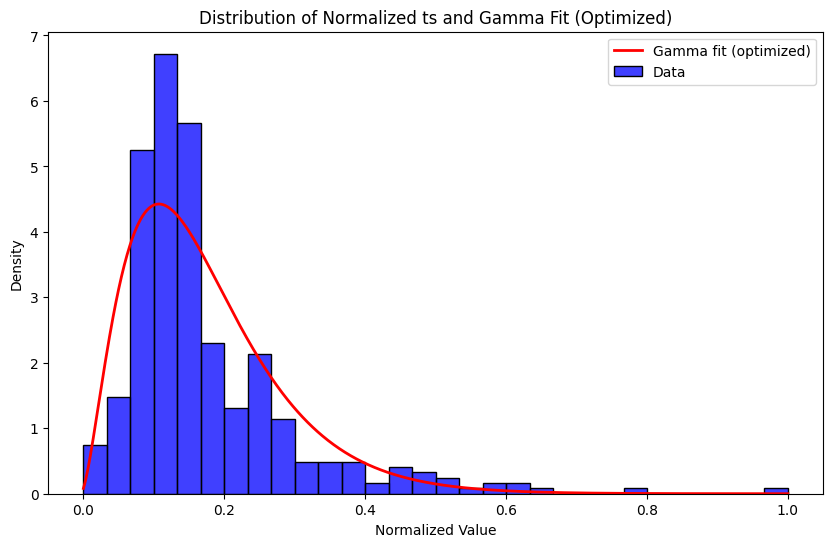

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma
from scipy.optimize import minimize
from scipy.special import gammaln

ts = anomalies_bs7089[:366, 6,4]

# Normalizzazione Min-Max
ts_min = np.min(ts)
ts_max = np.max(ts)
ts_normalized = (ts - ts_min) / (ts_max - ts_min)

# Funzione per calcolare la log-verosimiglianza negativa per la distribuzione gamma
def neg_log_likelihood(params, data):
    shape, loc, scale = params
    return -np.sum(gamma.logpdf(data, shape, loc=loc, scale=scale))

# Stime iniziali dei parametri
initial_params = gamma.fit(ts_normalized)

# Ottimizzazione dei parametri
result = minimize(neg_log_likelihood, initial_params, args=(ts_normalized,), method='L-BFGS-B',
                  bounds=[(1e-6, None), (None, None), (1e-6, None)])

# Parametri ottimizzati
shape_opt, loc_opt, scale_opt = result.x

# Generazione dei valori della distribuzione gamma fit ottimizzata
x = np.linspace(min(ts_normalized), max(ts_normalized), 1000)
pdf_fitted_opt = gamma.pdf(x, shape_opt, loc_opt, scale_opt)

# Plot della distribuzione dei valori normalizzati di ts
plt.figure(figsize=(10, 6))
sns.histplot(ts_normalized, bins=30, kde=False, color='blue', stat='density', label='Data')
plt.plot(x, pdf_fitted_opt, 'r-', lw=2, label='Gamma fit (optimized)')
plt.title('Distribution of Normalized ts and Gamma Fit (Optimized)')
plt.xlabel('Normalized Value')
plt.ylabel('Density')
plt.legend()
plt.show()


In [39]:
tp

<class 'netCDF4._netCDF4.Variable'>
float32 tp(time, lat, lon)
    _FillValue: nan
    long_name: Total precipitation
    units: m
    standard_name: lwe_thickness_of_precipitation_amount
    comment: The construction lwe_thickness_of_X_amount or _content means the vertical extent of a layer of liquid water having the same mass per unit area. 'Precipitation' in the Earth's atmosphere means precipitation of water in all phases. The abbreviation 'lwe' means liquid water equivalent.
    type: real
    accumulated_since: start of timestep
    coordinates: realization
    cell_methods: time: mean
unlimited dimensions: time
current shape = (19358, 37, 72)
filling on

In [30]:
from scipy.stats import chi2

# Dividi i dati in intervalli
observed_freq, bins = np.histogram(ts_normalized, bins=30, density=True)
expected_freq = gamma.pdf(bins, shape_opt, loc=loc_opt, scale=scale_opt) * len(ts_normalized) * (bins[1] - bins[0])

# Calcola il test Chi-Quadro 
chi2_stat = np.sum((observed_freq - expected_freq[:-1])**2 / expected_freq[:-1])
p_value_chi2 = chi2.sf(chi2_stat, df=len(observed_freq)-1-3)  # 3 parametri stimati

print(f"Chi-Quadro Statistic: {chi2_stat}")
print(f"P-Value: {p_value_chi2}")

Chi-Quadro Statistic: 309.902284256256
P-Value: 2.1995325794345143e-50


ADF Statistic: -18.78902772568366
p-value: 2.023606778132759e-30
Critical Values:
   1%: -3.4483935212959844
   5%: -2.8694912343676497
   10%: -2.571005879151811
ADF Statistic: -18.386020277339107
p-value: 2.2050185836312852e-30
Critical Values:
   1%: -3.4483935212959844
   5%: -2.8694912343676497
   10%: -2.571005879151811


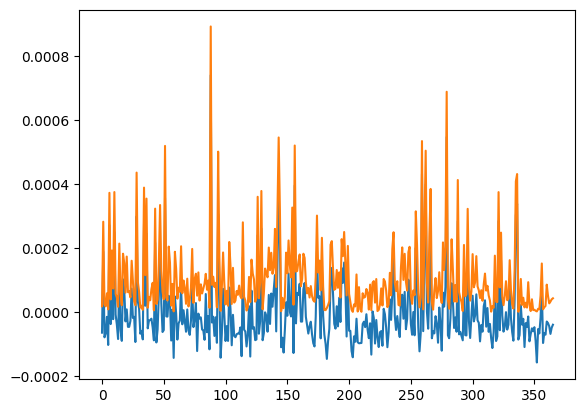

In [38]:
from statsmodels.tsa.stattools import adfuller

ts = anomalies_bs7089[:366, 6,4]
ts1 = tp[:366, 6,4]

plt.plot(ts)
plt.plot(ts1)
# Esegui il test ADF
adf_result = adfuller(ts)

# Stampa dei risultati
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')
    # Esegui il test ADF
adf_result1 = adfuller(ts1)

# Stampa dei risultati
print('ADF Statistic:', adf_result1[0])
print('p-value:', adf_result1[1])
print('Critical Values:')
for key, value in adf_result1[4].items():
    print(f'   {key}: {value}')

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

dataset = xr.open_dataset("K:/private/lorenzogamba,tomscag/total_precipitation_5grid.nc")
precipitation = dataset['tp'][:366, :, :]  # Supponendo che 'tp' sia la variabile di precipitazione

# Estrai le dimensioni
time_dim = dataset['time']
lat_dim = dataset['lat']
lon_dim = dataset['lon']

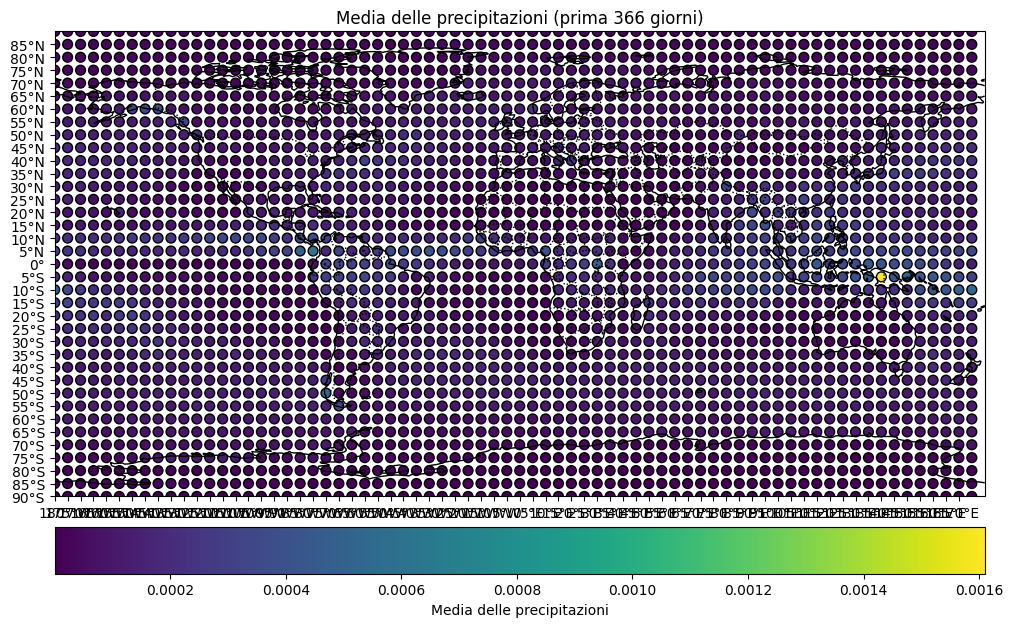

In [51]:
# Carica il dataset
dataset = xr.open_dataset("K:/private/lorenzogamba,tomscag/total_precipitation_5grid.nc")

# Seleziona i primi 366 giorni di dati di precipitazione
precipitation = dataset['tp'][:366, :, :]  # Supponendo che 'tp' sia la variabile di precipitazione

# Calcola la media delle precipitazioni su tutto il periodo per ogni combinazione di latitudine e longitudine
mean_precipitation = precipitation.mean(dim='time')

# Converti in DataFrame per facilitare la manipolazione
mean_precip_df = mean_precipitation.to_dataframe().reset_index()

# Estrai le coordinate e i valori di precipitazione media
lats = mean_precip_df['lat'].values
lons = mean_precip_df['lon'].values
mean_precip_values = mean_precip_df['tp'].values

# Creare una mappa con Cartopy
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Aggiungere caratteristiche alla mappa
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_xticks(np.arange(lons.min(), lons.max(), 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lats.min(), lats.max(), 5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot della media delle precipitazioni come heatmap
scatter = ax.scatter(lons, lats, c=mean_precip_values, cmap='viridis', s=50, edgecolor='k', transform=ccrs.PlateCarree())

# Aggiungere una colorbar
cbar = plt.colorbar(scatter, orientation='horizontal', pad=0.05)
cbar.set_label('Media delle precipitazioni')
plt.title('Media delle precipitazioni (prima 366 giorni)')
plt.show()


       lat    lon  adf_statistic   p_value  \
0    -90.0 -180.0      -2.769621  0.062746   
1    -90.0 -175.0      -2.769621  0.062746   
2    -90.0 -170.0      -2.769621  0.062746   
3    -90.0 -165.0      -2.769621  0.062746   
4    -90.0 -160.0      -2.769621  0.062746   
...    ...    ...            ...       ...   
2659  90.0  155.0      -4.403069  0.000293   
2660  90.0  160.0      -4.403069  0.000293   
2661  90.0  165.0      -4.403069  0.000293   
2662  90.0  170.0      -4.403069  0.000293   
2663  90.0  175.0      -4.403069  0.000293   

                                        critical_values  stationary  
0     {'1%': -3.4492815848836296, '5%': -2.869881371...       False  
1     {'1%': -3.4492815848836296, '5%': -2.869881371...       False  
2     {'1%': -3.4492815848836296, '5%': -2.869881371...       False  
3     {'1%': -3.4492815848836296, '5%': -2.869881371...       False  
4     {'1%': -3.4492815848836296, '5%': -2.869881371...       False  
...                        

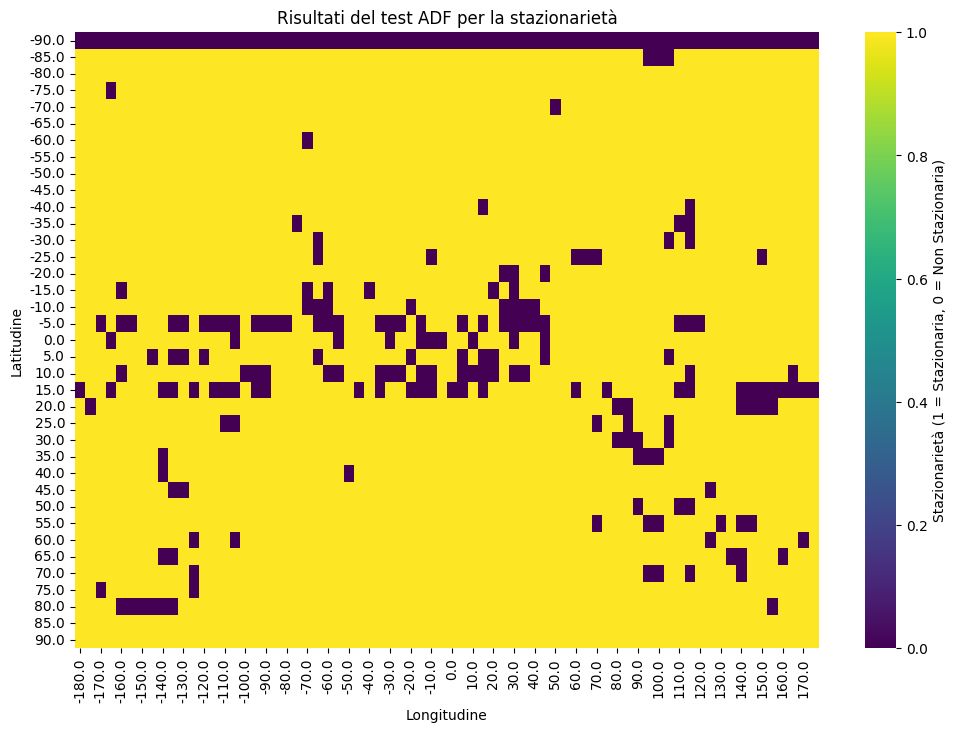

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

# Carica il dataset
dataset = xr.open_dataset("K:/private/lorenzogamba,tomscag/total_precipitation_5grid.nc")

# Seleziona i primi 366 giorni di dati di precipitazione
precipitation = dataset['tp'][:366, :, :]  # Supponendo che 'tp' sia la variabile di precipitazione

# Estrai le dimensioni del tempo, latitudine e longitudine
time_dim = dataset['time'][:366]
lat_dim = dataset['lat']
lon_dim = dataset['lon']

# Converti il dataset in un DataFrame per l'analisi
precip_df = precipitation.to_dataframe().reset_index()

# Creare un DataFrame per memorizzare i risultati ADF
adf_results = []

# Iterare su ogni combinazione di latitudine e longitudine
for lat in lat_dim:
    for lon in lon_dim:
        # Filtra il DataFrame per la latitudine e longitudine selezionate
        time_series = precip_df[(precip_df['lat'] == lat.values) & (precip_df['lon'] == lon.values)]['tp']
        
        # Esegui il test ADF
        adf_result = adfuller(time_series)
        
        # Memorizza i risultati in una lista
        adf_results.append({
            'lat': float(lat.values),  # Assicurati che lat sia uno scalare
            'lon': float(lon.values),  # Assicurati che lon sia uno scalare
            'adf_statistic': adf_result[0],
            'p_value': adf_result[1],
            'critical_values': adf_result[4],
            'stationary': adf_result[1] < 0.05  # Considera la serie come stazionaria se p-value < 0.05
        })

# Converti i risultati in un DataFrame
adf_results_df = pd.DataFrame(adf_results)

# Visualizza i risultati
print(adf_results_df)

# Esempio di visualizzazione dei risultati con una heatmap della stazionarietà
pivot_table = adf_results_df.pivot(index='lat', columns='lon', values='stationary')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', cbar_kws={'label': 'Stazionarietà (1 = Stazionaria, 0 = Non Stazionaria)'})
plt.title('Risultati del test ADF per la stazionarietà')
plt.xlabel('Longitudine')
plt.ylabel('Latitudine')
plt.show()

       lat    lon  adf_statistic   p_value  \
0    -90.0 -180.0      -2.769621  0.062746   
1    -90.0 -175.0      -2.769621  0.062746   
2    -90.0 -170.0      -2.769621  0.062746   
3    -90.0 -165.0      -2.769621  0.062746   
4    -90.0 -160.0      -2.769621  0.062746   
...    ...    ...            ...       ...   
2659  90.0  155.0      -4.403069  0.000293   
2660  90.0  160.0      -4.403069  0.000293   
2661  90.0  165.0      -4.403069  0.000293   
2662  90.0  170.0      -4.403069  0.000293   
2663  90.0  175.0      -4.403069  0.000293   

                                        critical_values  stationary  
0     {'1%': -3.4492815848836296, '5%': -2.869881371...       False  
1     {'1%': -3.4492815848836296, '5%': -2.869881371...       False  
2     {'1%': -3.4492815848836296, '5%': -2.869881371...       False  
3     {'1%': -3.4492815848836296, '5%': -2.869881371...       False  
4     {'1%': -3.4492815848836296, '5%': -2.869881371...       False  
...                        

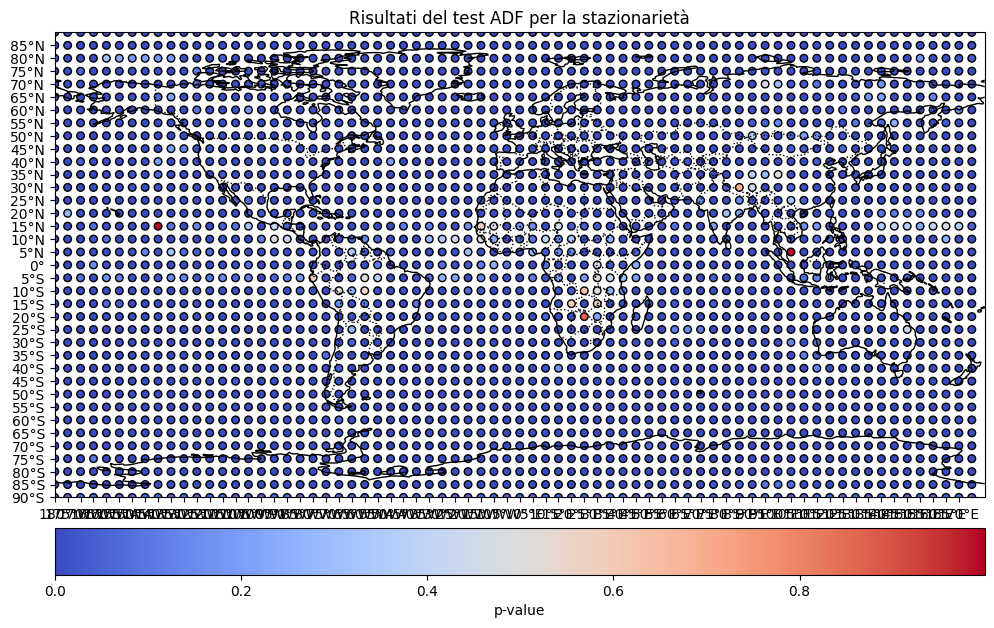

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from statsmodels.tsa.stattools import adfuller
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# Carica il dataset
dataset = xr.open_dataset("K:/private/lorenzogamba,tomscag/total_precipitation_5grid.nc")

# Seleziona i primi 366 giorni di dati di precipitazione
precipitation = dataset['tp'][:366, :, :]  # Supponendo che 'tp' sia la variabile di precipitazione

# Estrai le dimensioni del tempo, latitudine e longitudine
time_dim = dataset['time'][:366]
lat_dim = dataset['lat']
lon_dim = dataset['lon']

# Converti il dataset in un DataFrame per l'analisi
precip_df = precipitation.to_dataframe().reset_index()

# Creare un DataFrame per memorizzare i risultati ADF
adf_results = []

# Iterare su ogni combinazione di latitudine e longitudine
for lat in lat_dim:
    for lon in lon_dim:
        # Filtra il DataFrame per la latitudine e longitudine selezionate
        time_series = precip_df[(precip_df['lat'] == lat.values) & (precip_df['lon'] == lon.values)]['tp']
        
        # Esegui il test ADF
        adf_result = adfuller(time_series)
        
        # Memorizza i risultati in una lista
        adf_results.append({
            'lat': float(lat.values),  # Assicurati che lat sia uno scalare
            'lon': float(lon.values),  # Assicurati che lon sia uno scalare
            'adf_statistic': adf_result[0],
            'p_value': adf_result[1],
            'critical_values': adf_result[4],
            'stationary': adf_result[1] < 0.05  # Considera la serie come stazionaria se p-value < 0.05
        })

# Converti i risultati in un DataFrame
adf_results_df = pd.DataFrame(adf_results)

# Visualizza i risultati
print(adf_results_df)

# Preparare i dati per la heatmap
lats = adf_results_df['lat'].values
lons = adf_results_df['lon'].values
p_values = adf_results_df['p_value'].values
stationary = adf_results_df['stationary'].values

# Creare una mappa con Cartopy
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Aggiungere caratteristiche alla mappa
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_xticks(np.arange(lons.min(), lons.max(), 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lats.min(), lats.max(), 5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot delle stazionarietà come heatmap
stationary_mask = np.where(stationary, 'blue', 'red')
scatter = ax.scatter(lons, lats, c=p_values, cmap='coolwarm', s=30, edgecolor='k', transform=ccrs.PlateCarree())

# Aggiungere una colorbar
cbar = plt.colorbar(scatter, orientation='horizontal', pad=0.05)
cbar.set_label('p-value')
plt.title('Risultati del test ADF per la stazionarietà')
plt.show()